# Non-Convex Optimization 3d

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from scipy.optimize import minimize
from ipywidgets import Dropdown
from IPython.display import HTML
%matplotlib inline

## SGD Variations

In [7]:
def sgd(func, gradient_x, gradient_y, x0, learning_rate=0.1, max_iter=1000): 
    x = x0
    losses = []
    for t in range(1, max_iter + 1):
        g_x = gradient_x(*x)  # Compute gradient of the objective function with respect to x
        g_y = gradient_y(*x)  # Compute gradient of the objective function with respect to y
        x = np.array([x[0] - learning_rate * g_x, x[1] - learning_rate * g_y])  # Update parameters using gradient descent
        loss = func(*x)  # Compute loss at updated parameters
        losses.append(loss)  # Store loss for visualization or monitoring
    return x, losses

def adagrad(func, gradient_x, gradient_y, x0, learning_rate=0.1, epsilon=1e-8, max_iter=1000):
    cache_x = np.zeros_like(x0, dtype=float)
    cache_y = np.zeros_like(x0, dtype=float)
    x = x0
    losses = []
    for t in range(1, max_iter + 1):
        g_x = gradient_x(*x)  # Compute gradient of the objective function with respect to x
        g_y = gradient_y(*x)  # Compute gradient of the objective function with respect to y
        cache_x += g_x ** 2
        cache_y += g_y ** 2
        x = np.array([x[0] - learning_rate * g_x / (np.sqrt(cache_x) + epsilon),
                      x[1] - learning_rate * g_y / (np.sqrt(cache_y) + epsilon)])  # Update parameters using adaptive learning rates
        loss = func(*x)  # Compute loss at updated parameters
        losses.append(loss)  # Store loss for visualization or monitoring
    return x, losses

def rmsprop(func, gradient_x, gradient_y, x0, learning_rate=0.1, beta=0.9, epsilon=1e-8, max_iter=1000):
    cache_x = np.zeros_like(x0)
    cache_y = np.zeros_like(x0)
    x = x0
    losses = []
    for t in range(1, max_iter + 1):
        g_x = gradient_x(*x)  # Compute gradient of the objective function with respect to x
        g_y = gradient_y(*x)  # Compute gradient of the objective function with respect to y
        cache_x = beta * cache_x + (1 - beta) * (g_x ** 2)
        cache_y = beta * cache_y + (1 - beta) * (g_y ** 2)
        x = np.array([x[0] - learning_rate * g_x / (np.sqrt(cache_x) + epsilon),
                      x[1] - learning_rate * g_y / (np.sqrt(cache_y) + epsilon)])  # Update parameters using adaptive learning rates
        loss = func(*x)  # Compute loss at updated parameters
        losses.append(loss)  # Store loss for visualization or monitoring
    return x, losses

def adam(func, gradient_x, gradient_y, x0, learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=1000):
    m_x = np.zeros_like(x0)
    m_y = np.zeros_like(x0)
    v_x = np.zeros_like(x0)
    v_y = np.zeros_like(x0)
    x = x0
    losses = []
    for t in range(1, max_iter + 1):
        g_x = gradient_x(*x)  # Compute gradient of the objective function with respect to x
        g_y = gradient_y(*x)  # Compute gradient of the objective function with respect to y
        m_x = beta1 * m_x + (1 - beta1) * g_x
        m_y = beta1 * m_y + (1 - beta1) * g_y
        v_x = beta2 * v_x + (1 - beta2) * (g_x ** 2)
        v_y = beta2 * v_y + (1 - beta2) * (g_y ** 2)
        m_hat_x = m_x / (1 - beta1 ** t)
        m_hat_y = m_y / (1 - beta1 ** t)
        v_hat_x = v_x / (1 - beta2 ** t)
        v_hat_y = v_y / (1 - beta2 ** t)
        x = np.array([x[0] - learning_rate * m_hat_x / (np.sqrt(v_hat_x) + epsilon),
                      x[1] - learning_rate * m_hat_y / (np.sqrt(v_hat_y) + epsilon)])  # Update parameters using adaptive learning rates
        loss = func(*x)  # Compute loss at updated parameters
        losses.append(loss)  # Store loss for visualization or monitoring
    return x, losses



## Saddle Point

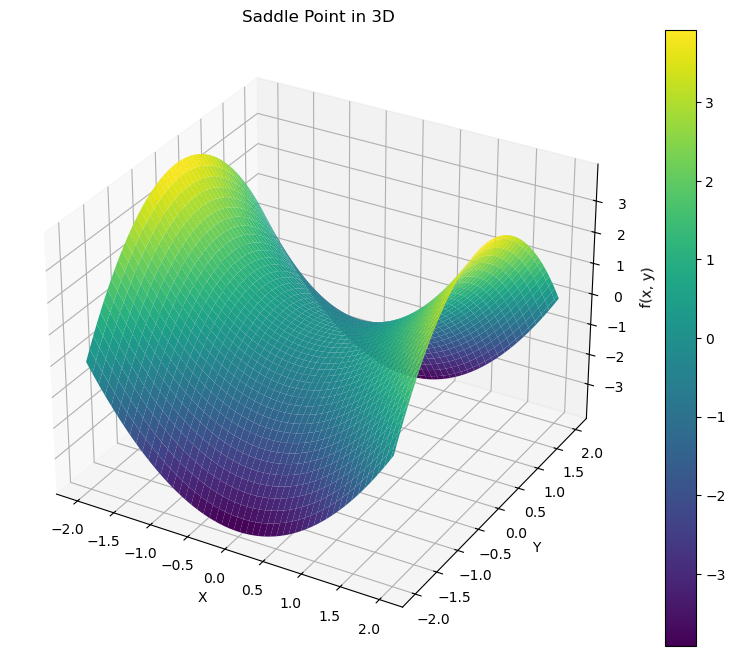

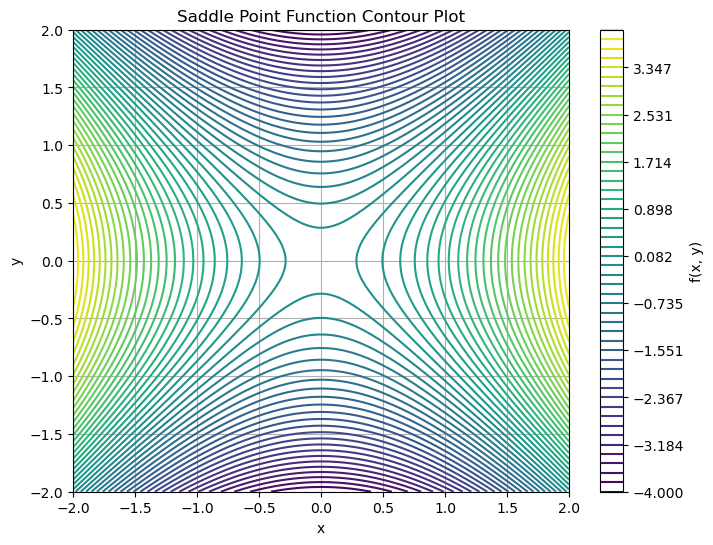

In [8]:
# Define the function
def saddle_point(x, y):
    return x**2 - y**2

# Generate data
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = saddle_point(X, Y)

# Plot the function in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('Saddle Point in 3D')

# Add a color bar
fig.colorbar(surf)
plt.show()

# Plot the contour in 2D
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=np.linspace(-4, 4, 50), cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Saddle Point Function Contour Plot')
plt.colorbar(label='f(x, y)')
plt.grid(True)
plt.show()